<img src=https://img.gazeta.ru/files3/923/11732923/dicaprio-pic905-895x505-13209.jpg><br>
<hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>
Спасибо за проделанную работу🤝

Евгения, спасибо за доработки, всё принято👌
    
Дополнения по двум пунктам:
- [Переменные](#21-bullet)
- [Процентные пункты](#22-bullet)
    
Не буду задерживать, проект принимаю, желаю дальнейших успехов🖐

Поздравляю, проект принят👍

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Евгения, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на _ВЫ_ .

🤝Спасибо, что сдала проект. Тобой проделана большая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа ✅</b><br>
    Безупречная работа</div>       
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить ⚠️</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать ⛔️</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать аналитиком

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Например, вот так.</div>
   
Поехали! :)

<hr style="border: 2px solid green;" />

# Проект по теме "Принятие решений в бизнесе"

## Описание проекта

Я являюсь аналитиком в крупном интернет-магазине и мне необходимо проанализировать несколько гипотез. Наша задача- приоритизировать гипотезы и запустить А/В-тест. 

**Мною были получаны следующие данные:** 
1. 9 гипотез по увленичению выручки интернет-магазина
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
2. файлы с заказами и группами
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

3. файл с группами 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


На первом этапе мы подгрузим нужные библиотеки и посмотрим на предоставленные нам данные по гипотезам.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt           # графики
import matplotlib.ticker as ticker
import seaborn as sns

from scipy import stats as st              #  статистика
from IPython.display import display_html   # отображение таблиц рядом

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')     # загружаем данные 
# расширяем колонки
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
#  название столбцов с маленькой буквы + информация по таблице 
hypothesis.columns = hypothesis.columns.str.lower()  
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


По просмотренным данным можно сказать: 
1. предоставлены 9 гипотез
2. пропущенных значений нет
3. нулевых значений нет 
4. типы данных в порядке 


**Смотрим на приоретизацию данных гипотез. Для этого применим фреймворк ICE.**

`ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач`
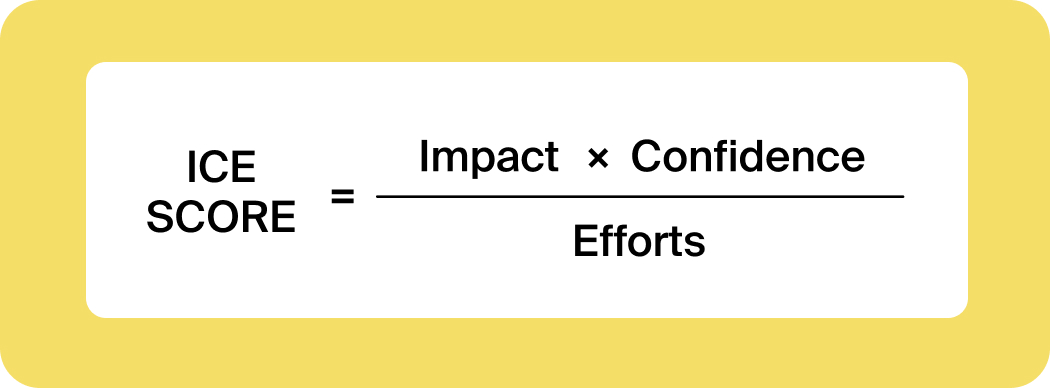

In [4]:
hypothesis['ICE'] = (((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2))    
# расчет ICE, округляем до 2 знаков 
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)            # сортировка по убыванию

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Теперь мы видим, что ТОП-5 гипотез являются гипотезы № 9, 1, 8, 7, 3. 


**Тпереь посмотрим на приоритезацию гипотез методом `RICE.`**
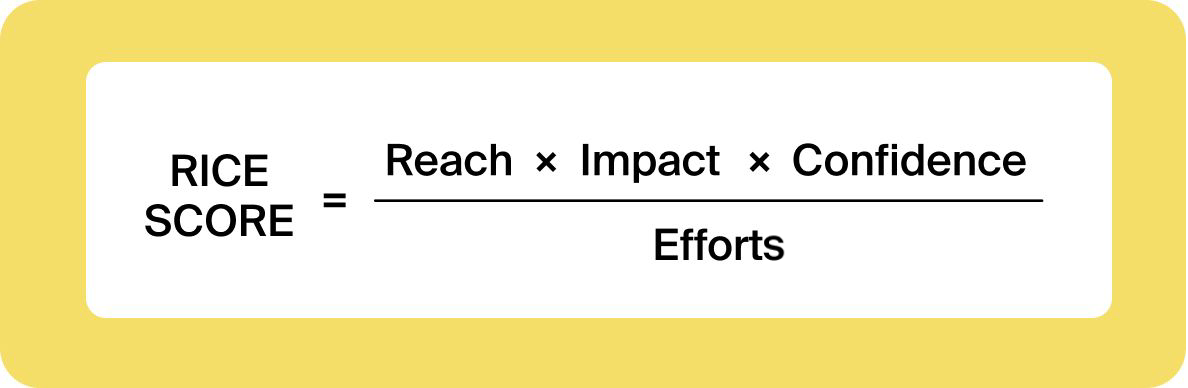

In [5]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] ) 
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)             # сортировка по убыванию

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


ТОП-5 RICE это гипотезы 8, 3, 1, 7, 9. 

**Сравнительный анализ:**

Построим график, отображающий информацию о различии ICE and RICE и сначала установим индекс по номерам гипотез

In [6]:
hypothesis.index = np.arange(1, len(hypothesis)+1)        # установим индекс по номерам гипотез
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


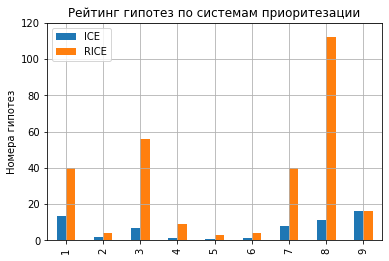

In [7]:
hypothesis[['ICE', 'RICE']].plot(kind='bar')
plt.title('Рейтинг гипотез по системам приоритезации')
plt.ylabel('Номера гипотез')
plt.ylim(0, 120)
plt.grid()
plt.show()

**Выводы по полученным данным:**

1. ТОП-5 в рейтинге гипотез по ICЕ: 9, 1, 8, 7, 3
2. ТОП-5 в рейтинге гипотез по RICE: 8, 3, 1, 7, 9
3. параметр охвата (Reach) изменил приоритетность: 
- Исходя из изменений в топ-5 гипотез, мы можем сказать, что гипотеза №9 спустилась на 5 место, так как показатель охвата пользователей (reach) слишком низок, всего 1 из 10. День рождения только раз в году)
- Позиции гипотезы 3 явно улучшились из-за этого показатель reach - один из самых массовых охватов.
- Гипотеза 8 по этой же причине поднялась на первое место - максимальный охват аудитории (reach = 10).

*Теперь актуальными гипотезами для проверки можно считать следующие:*
1. Гипотеза №8: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	"
2. Гипотеза №3: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
3. Гипотеза №1: "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	"
4. Гипотеза №7: "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Ты отлично справилась с приоритезацией гипотез, разобралась, что признак <code>REACH</code> может оказывать сильное влияние</div> <br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить</b><br>
<ul>
   <li>в качестве визуализации изменения приоритетов можно использовать <a href="https://datayoga.ru/tpost/zh3s62fori-sloupgraf">slope graph</a> или диаграмму рассеяния, где по осям отложен баллы каждого фреймворка
    <li> В отчёте есть формулы для расчёта приоритезации, почему бы их не оформить, для этого есть микропакет для вёрстки `LaTex` - <a href="https://www.youtube.com/watch?v=vSc25kdgecg">Использование LaTex в Jupyter Notebook</a>
<br><a href="https://www.overleaf.com/static/latex/learn/free-online-introduction-to-latex-part-1.pdf">LaTex for beginners</a>. Вот так будут выглядеть формулы:👇
</ul></div> <br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$
<hr style="border: 2px solid orange;" />

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Спасибо большое за подсказки. 
К сожалению, не смогла понять, как строится слоупграф (именно сам код).
    
Спасибо за то, что подсказали, как прописываются формулы, это усвоила). 
</div>

## Анализ A/B-теста

По проведенному A/B-тесту требуется сделать анализ:

1. Кумулятивной выручки по группам.
2. Кумулятивного среднего чека по группам.
3. Относительного изменения кумулятивного среднего чека группы B к группе A.
4. Кумулятивной конверсии по группам.
5. Относительного изменения кумулятивной конверсии группы B к группе A.

Определить:

1. Границы аномалий по количествов заказов и стоимости заказов по пользователям.


Посчитать и описать результаты расчета:

1. Статистической значимости различий в конверсии между группами по «сырым» данным.
2. Статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.
3. Статистической значимости различий в конверсии между группами по «очищенным» данным.
4. Статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Принять решение по результатам теста

1. Варианты решений:
2. Остановить тест, зафиксировать победу одной из групп.
3. Остановить тест, зафиксировать отсутствие различий между группами.
4. Продолжить тест.

**Просмотрим данные по заказам:**

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
display(orders.describe())
print ('Кол-во обнаруженных дубликатов:', orders.duplicated().sum())
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Кол-во обнаруженных дубликатов: 0


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Просмотрев данные по заказам можно увидеть, что: 
1. Дубликатов нет
2. Всего 1197 заказов 
3. Типы данных в порядке 
4. Нулевые и пропущенные значения отсутствуют \


**Теперь посмотрим данные по пользователям**

In [12]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head(10))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
print(visitors.describe())
print ('Кол-во обнаруженных дубликатов:', visitors.duplicated().sum())


         visitors
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000
Кол-во обнаруженных дубликатов: 0


Просмотрев записи о пользователях, я увидела, что: 
1. Присутсвуют 62 записи;
2. Нет пропущенных и нулевых значений;
3. Типы данных соответствуют своим форматам;
4. Дубликатов нет.
<br>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Обзор данных выполнен отлично, кажется, нам достались чистые данные!</div> <br>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Дополнительно по данным АВ теста можно проверить:
<ul>
    <li> Доли по кол-ву посетителей по группам (должно быть примерно 50\50)
    <li> Пересечение пользователей - может быть есть те, кто попал в обе группы? Удалять таких пользователей не надо, достаточно проверить</ul></div> <br>


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>
    Доли по количеству посетителей отмечала чуть позже. "Кол-во посещений в группе А за месяц 18736.
Кол-во посещений в группе Б за месяц 18916"
   
    
Пересечение пользователей проверено. Их нет, как было 1197 заказов во всех группах, так и осталось. Нашла только такое решение для проверки пересечения пользователей: 
</div>


In [15]:
mask = orders.loc[orders["group"]=="A", "transactionId"].isin(orders.loc[orders["group"]=="B", "transactionId"])
res = orders.drop(mask[mask].index)
res.shape

(1197, 5)

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Комментарий 2</b><br><code>transactionId</code> - идентификатор покупки, поэтому они все разные и непересекаются, чтобы проверить пользователей, нужно в этот же код подставить айдишник пользователя <code>visitorId</code> - пример ниже и посчитать уникальных юзеров</div> 

In [67]:
#CODE REVIEW
mask = orders.loc[orders["group"]=="A", "visitorId"].isin(orders.loc[orders["group"]=="B", "visitorId"])
orders.loc[mask[mask].index, "visitorId"].nunique()

58

<hr style="border: 2px solid green;" />

Теперь подготовим данные для A/B теста. 
Сначала разберемся с **кол-вом пользователей по группам**

In [16]:
# количество пользователей в день в группе А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
# отдельные столбцы 
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [17]:
# накопительное количество пользователей в день
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
             .agg({'date' : 'max', 
                   'visitorsPerDateA' : 'sum'}), axis=1
)
# соответствующие столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [18]:
# количество пользователей в день в группе B
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [19]:
# накопительное количество пользователей в день в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
              .agg({'date' : 'max', 
                    'visitorsPerDateB' : 'sum'}), axis=1
)
# соответствующие столбцы
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [20]:
print('Кол-во посещений в группе А за месяц', visitorsADaily.visitorsPerDateA.sum())
      
print('Кол-во посещений в группе Б за месяц', visitorsBDaily.visitorsPerDateB.sum())

Кол-во посещений в группе А за месяц 18736
Кол-во посещений в группе Б за месяц 18916


Количество посещений в группах за месяц проведения теста практически совпадает.

**Количество заказов в группах А и В**

In [21]:
# количество заказов и суммарная выручка в день по группе А
ordersADaily = (
    orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]
                       .groupby('date', as_index=False)
                       .agg({'transactionId' : pd.Series.nunique,'revenue' : 'sum'})
)
# соответствующие столбцы
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [22]:
# накопительное количество заказов и суммарной выручки в день по группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
            .agg({'date' : 'max', 
                  'ordersPerDateA' : 'sum', 
                  'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date']
)
# соответствующие столбцы
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersACummulative.tail()

,date,ordersCummulativeA,revenueCummulativeA
26,2019-08-27,495,3514698
27,2019-08-28,512,3615820
28,2019-08-29,534,3936510
29,2019-08-30,545,4022970
30,2019-08-31,557,4084803


In [23]:
# количество заказов и суммарная выручка в день по группе B
ordersBDaily = (
    orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]
                    .groupby('date', as_index=False)
                    .agg({'transactionId' : pd.Series.nunique, 
                          'revenue' : 'sum'})
)
# соответствующие столбцы
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [24]:
# накопительное количество заказов и суммарной выручки в день по группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
            .agg({'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
# соответствующие столбцы
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
ordersBCummulative.tail()

,date,ordersCummulativeB,revenueCummulativeB
26,2019-08-27,548,5232260
27,2019-08-28,576,5328268
28,2019-08-29,596,5559398
29,2019-08-30,620,5774631
30,2019-08-31,640,5907760


Количество заказов в группе А (557)меньше чем в группе В (640)

**Составление общей таблицы по группам А и В**

In [25]:
# объединим полученные данные в один датасет, по дате заказа
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(15)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


### График кумулятивной выручки

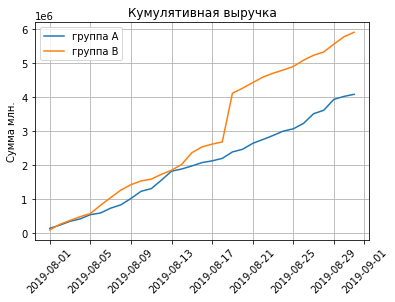

In [26]:
# график кумулятивной выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], label='группа A')

# график кумулятивной выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], label='группа B')
plt.xticks(rotation=45)
plt.grid()
plt.title('Кумулятивная выручка')
plt.ylabel('Сумма млн.')
plt.legend();

Выручка растет в течении всего времени по обеим группам, но заметен резкий скачок в группе В. Могу предположить, что в данных есть выбросы с 17 по 20 августа. Кроме того мы видим, что выручка в группе В выше, скорее всего на это также влияет и кол-во заказов (их больше). И начиная с 17 августа мы видим разницу в выручке групп. В группе А она устойчиво и плавно растет, в группе В она выше на 2 млн.


### График кумулятивного среднего чека по группам

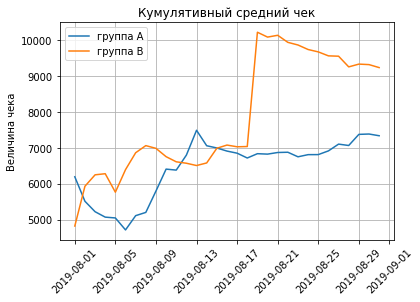

In [27]:
# график кумулятивного среднего чека группы А
plt.plot(data['date'], data['revenueCummulativeA'] / data['ordersCummulativeA'], label='группа A')

# график кумулятивного среднего чека группы B
plt.plot(data['date'], data['revenueCummulativeB'] / data['ordersCummulativeB'], label='группа B')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.title('Кумулятивный средний чек')
plt.ylabel('Величина чека');

Средний чек группы В растет и виден резкий скачок 18-20 августа (дорогая покупка?).

Группа А после провала в начале августа показывает более быстрый рост по среднему чеку, но стабилизируется на уровне 7000 уже к середине теста. В группе В стабилизации среднего чека явно мешает "выброс".

### График относительного изменения кумулятивного среднего чека группы B к группе A

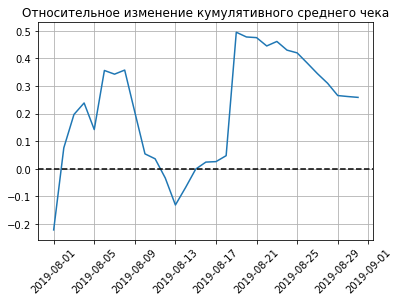

In [28]:
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(
                        data['revenueCummulativeA']/data['ordersCummulativeA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.grid()
plt.title('Относительное изменение кумулятивного среднего чека');

- Группа В за пару дней теста увеличила свой средний чек выше значений группы А.
- Два периода явно "аномально" дорогих покупок в группе В удерживали значения среднего чека выше чем в группе А.
- Надо удостоверится в сохранении преимущества после отсечения данных по выбросам

### График кумулятивной конверсии по группам

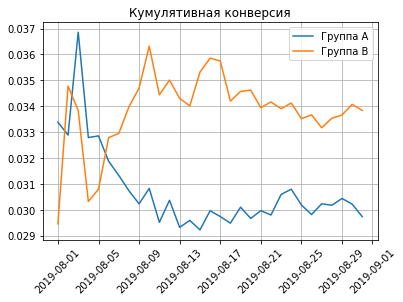

In [29]:
# строим график кумулятивной конверсии
plt.plot(data['date'], data['ordersCummulativeA'] / data['visitorsCummulativeA'], label='Группа A')
plt.plot(data['date'], data['ordersCummulativeB'] / data['visitorsCummulativeB'], label='Группа B')

plt.xticks(rotation=45)
plt.title('Кумулятивная конверсия')
plt.legend()
plt.grid();

- Конверсия по группам вначале наблюдений колеблется очень сильно.
- После недели наблюдений устанавливается тенденция в разнице конверсий.
- Конверсия группы В выше чем в группе А.
- Со временем колебания значений конверсии уменьшаются.

### График относительного изменения кумулятивной конверсии группы B к группе A

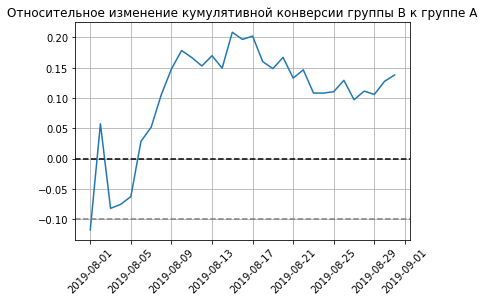

In [30]:
plt.plot(data['date'], (data['ordersCummulativeB'] / data['visitorsCummulativeB']) / (
                        data['ordersCummulativeA'] / data['visitorsCummulativeA'])-1)

plt.xticks(rotation=45)
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title('Относительное изменение кумулятивной конверсии группы B к группе A');

- Первую неделю теста группа B значительно проигрывала группе A.
- После резкого роста, разница в конверсиях установилась на уровне 10% (выше у группы В).
- Колебания конверсий к концу теста еще сохраняются в пределах 2-3%
<br>


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Раздел кумулятивных метрик выполнен прекрасно:
<ul>
    <li> данные подготовлены
    <li> графики построены
    <li> проанализировано поведение метрик
    <li> отмечены аномалии и их возможные причины</ul>
Молодец, так держать💪</div> <br>

### Точечный график количества заказов по пользователям
Для обнаружения аномальных данных, проведем анализ выбросов по нескольким данным: 
1. количество заказов пользователей и стоимости заказов. 
2. Отфильтруем данные исключив аномалии из анализа.

In [31]:
ordersByUsers = orders.drop(['group', 'date'], axis=1) \
                                .groupby('visitorId', as_index=False) \
                                .agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId', 'transactionId']

ordersByUsers.sort_values(by='transactionId',ascending=False).head(10)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


In [32]:
ordersByUsers.shape

(1031, 2)

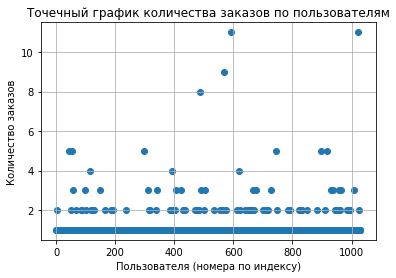

In [33]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователя (номера по индексу)')
plt.grid();

Больше 2 заказов у пользователя можно считать аномальным явлением, всего несколько пользователей заказывали более 6 раз.
Проверим показатели по выбросам с помощью 95-99% границ распределения.

### 95-й и 99-й перцентили количества заказов на пользователя**



In [34]:
np.percentile(ordersByUsers['transactionId'], [95, 97.5, 99])


array([2., 3., 4.])

Верхнюю границу диапазона принимаем = 2 (95% охват всех заказов)

### Точечный график стоимостей заказов

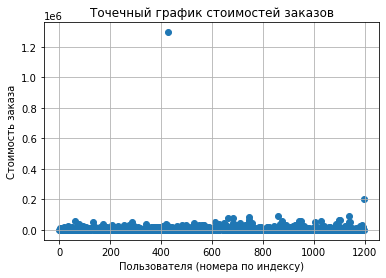

In [35]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователя (номера по индексу)')
plt.grid();

На графике видны явные аномалии в стоимости заказов - две аномалии. Поэтому для более точной картины проведем также анализ 95-99% зон распределения.

### 95-й и 99-й перцентили стоимости заказов пользователей

In [36]:
np.percentile(orders['revenue'], [95, 97.5, 99])

array([28000. , 39530. , 58233.2])

Примем за верхнюю границу стоимости заказ не более 30 000, так мы охватим более 95% данных.
<br>


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
    <img width="320" src=https://storage.yandexcloud.net/public-bucket-6/outliers_1.png><br>
<ul>
    <li> Аномалии исследованы верно - ✅
    <li> Границы выбраны корректно - ✅</ul></div> <br>





<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>
<ul>
Очень крутой и показательный график))))
    </ul></div><br>
</div>

## Статистическая значимость 
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'].
В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [37]:
# пользователи группы А
ordersByUsersA = orders[orders['group']=='A'] \
                        .groupby('visitorId', as_index=False) \
                        .agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'transactionId']
ordersByUsersA.head()

,visitorId,transactionId
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [38]:
ordersByUsersA.describe()


,visitorId,transactionId
count,5.030000e+02,503.000000
mean,2.159779e+09,1.107356
std,1.218811e+09,0.517046
min,8.300375e+06,1.000000
25%,1.067031e+09,1.000000
50%,2.219162e+09,1.000000
75%,3.160697e+09,1.000000
max,4.278983e+09,7.000000


In [39]:
# пользователи группы В
ordersByUsersB = orders[orders['group']=='B'] \
                          .groupby('visitorId', as_index=False) \
                          .agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'transactionId']
ordersByUsersB.head()

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [40]:
ordersByUsersB.describe()


,visitorId,transactionId
count,5.860000e+02,586.000000
mean,2.126231e+09,1.092150
std,1.247753e+09,0.443421
min,5.114589e+06,1.000000
25%,1.041653e+09,1.000000
50%,2.111874e+09,1.000000
75%,3.170684e+09,1.000000
max,4.283872e+09,6.000000


Для проведения статистического анализа по критерием Манна-Уитни создадим две переменные `sampleA и sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [41]:
data.head()  # общая таблица с данными количеству заказов и визитов


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [42]:
sampleA = pd.concat([ordersByUsersA['transactionId'], 
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), 
                     name='transactionId')], axis=0)
sampleA.shape

(18736,)

In [43]:
sampleA.describe()

count    18736.000000
mean         0.029729
std          0.197994
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: transactionId, dtype: float64

In [44]:
sampleB = pd.concat([ordersByUsersB['transactionId'], 
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), 
                     name='transactionId')], axis=0)
sampleB.shape

(18916,)

`sampleA и sampleB` это выборки, где каждый элемент — число заказов определённого пользователя, в том числе ноль.
Значит, число элементов `sampleA` — это количество пользователей, сумма всех элементов — количество заказов.

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. (конверсия в группе = сумма заказов делим на число пользователей, т.е найдём среднее в выборке sampleA и sampleB методом mean()).

### Статистическая значимость различий в конверсии между группами
Проверим гипотезы о различии показателей конверсии в двух группах А и В. За нулевую гипотезу примем предположение, что статистически значимых различий в конверсии нет, **тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.   Для проверки был выбран непараметрический тест Манна-Уитни, который помогает определить равны ли распределения двух независимых выборок или нет, т.к. наши данные не очищенны и, скорее всего, в них есть выбросы. 
Для проверки критическим уровень был назначен "классический"= 0.05**


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Перед началом проверок необходимо указать:
<ul>
    <li> Выбранный статистический тест
    <li> Выбранный критический уровень стат значимости
    <li> Полностью сформулировать гипотезы - нулевая есть, альтернативная осталась (пожалуйста выдели любым способом формулировки)</ul></div><br>
    
    
<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>
<ul>
    <li> Было написано, какой статистический тест мною выбран (Манна-Уитни) 
        <li> Критический уровень значимости= 0.05
    <li> Дополнила формулировку альтернативной гипотезы)
    </ul></div><br>
- 
</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍</div> 

In [45]:
alpha = 0.05
if (st.mannwhitneyu(sampleA, sampleB)[1] < alpha):
    print("Отвергаем нулевую гипотезу, \nстатистически значимые различия в конверсии групп А и В есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

Отвергаем нулевую гипотезу, 
статистически значимые различия в конверсии групп А и В есть
p-value = 0.017


Проверим насколько различаются конверсии в двух группах А и В.

In [46]:
print("Отношение конверсий групп В и А =", sampleB.mean()/sampleA.mean()-1)


Отношение конверсий групп В и А = 0.13807884655320146


**Выводы по сырым данным**

- Различия в конверсии групп А и В есть.
- Конверсия группы В выше на 13,8% (в среднем) чем в группе А.

### Статистическая значимость различий в среднем чеке между группами, по «сырым» данным

Проверим гипотезы о различии показателей в среднем чеке в двух группах А и В. За нулевую гипотезу примем предположение, что статистически значимых различий в размере среднего чека нет. **Альтернативная гипотеза: Статистически значимые различия имеются** Для расчета статистической значимости различий по среднему чеку, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [47]:
alpha = 0.05
if (st.mannwhitneyu(
                orders[orders['group']=='A']['revenue'], 
                orders[orders['group']=='B']['revenue'])[1] < alpha):
    print("Отвергаем нулевую гипотезу, \nстатистически значимые различия в среднем чеке групп А и В есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу, \nстатистически значимых различий в среднем чеке групп А и В нет")

print("p-value = {0:.3f}".format(st.mannwhitneyu(
                            orders[orders['group']=='A']['revenue'], 
                            orders[orders['group']=='B']['revenue'])[1]))

Не получилось отвергнуть нулевую гипотезу, 
статистически значимых различий в среднем чеке групп А и В нет
p-value = 0.729


In [48]:
print('Отношение среднего чека групп В и А = {0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean() \
                                                           /orders[orders['group']=='A']['revenue'].mean()-1))

Отношение среднего чека групп В и А = 25.87%


**Выводы по сырым данным**

- Cтатистически значимых различий в среднем чеке групп А и В нет.
- Средний чек группы В выше на 25,87% (в среднем) чем в группе А.


### Cтатистическая значимость различий между группами по «очищенным» данным

<a class="anchor" id="21-bullet"></a>

In [70]:
#CODE REVIEW
REVENUE_THR = orders['revenue'].quantile(0.975)
ORDERS_AMOUNT_THR = orders.groupby('visitorId').agg({'transactionId': 'count'})['transactionId'].quantile(0.975)

28000.000000000004

In [49]:
# определяем базу по заказам с аномальным количеством.
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['transactionId'] > 2]['visitorId'], 
     ordersByUsersB[ordersByUsersB['transactionId'] > 2]['visitorId']], axis = 0)
usersWithManyOrders.shape

(24,)

In [50]:
# определяем базу по аномальной сумме заказа.
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
usersWithExpensiveOrders.shape
#usersWithExpensiveOrders= orders[orders['revenue'].quantile(0.975)]['visitorId']
#usersWithExpensiveOrders.shape

(54,)

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Крайне не желательно использовать ручное указание порогов, тк при других данных придется руками изменять их - можно что-то пропустить. Хороший способ ввести переменные, например, <code>REVENUE_THRESHOLD</code> и вычислять её, например, так <code>REVENUE_THRESHOLD = df[revenue].quantile(0.975)</code></div> <br>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>
<ul>
    Я попыталась, но почему-то выдает здесь ошибку
    </ul></div><br>
</div>


In [51]:
# создаем список пользователей совершивших аномальные заказы
abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

In [52]:
abnormalUsers.shape

(68,)

In [53]:
# создаем базу для расчетов с отфильтрованными заказами для группы А
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'] \
                                   .isin(abnormalUsers))]['transactionId'], 
     pd.Series(0, index=np.arange(data['visitorsPerDateA'] \
                                   .sum() - len(ordersByUsersA['transactionId'])), name='transactionId')], axis=0)
sampleAFiltered.shape

(18693,)

In [54]:
# создаем базу для расчетов с отфильтрованными заказами для группы В
sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'] \
                                   .isin(abnormalUsers))]['transactionId'], 
     pd.Series(0, index=np.arange(data['visitorsPerDateB'] \
                                    .sum() - len(ordersByUsersB['transactionId'])), name='transactionId')], axis=0)
sampleBFiltered.shape

(18872,)

Из данных были удалены: 
1. 24 заказа с аномальными значениями 
2. 54 заказа с аномальной суммой заказа
3. 68 пользователей совершивших аномальный заказ


### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным
Проверим гипотезы о различии показателей конверсии в двух группах А и В по «очищенным» данным. За нулевую гипотезу примем предположение, что статистически значимых различий в конверсии нет. **Альтернативная гипотеза: "Статистически значимые различия есть". Здесь также будет использоваться тест Манна-Уитни.**

In [55]:
alpha = 0.05
if (st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha):
    print("Отвергаем нулевую гипотезу, \nстатистически значимые различия в конверсии групп А и В есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

Отвергаем нулевую гипотезу, 
статистически значимые различия в конверсии групп А и В есть
p-value = 0.013


In [56]:
print("Отношение конверсий групп В и А = ", sampleBFiltered.mean()/sampleAFiltered.mean()-1)

Отношение конверсий групп В и А =  0.17155456396208346


**Выводы по очищенным данным**

- Различия в конверсии групп А и В есть, показатель сохранился.
- Конверсия группы В выше на 17,2% (в среднем) чем в группе А. Показатель вырос на 4%.

<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
Когда величины измеряются в процентах (конверсия до и после) нельзя о разнице говорить тоже в процентах - для понимания небольшой комикс<br>
<img src=https://storage.yandexcloud.net/public-bucket-6/percent_vs_pp.jpg></div> <br>

<br>
<a class="anchor" id="22-bullet"></a>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Комментарий 2</b><br>Сейчас распутаемся: смысл не в самих 17 или 13%, а в разнице между ними, ты пишешь <code>относительное изменение увеличилось на 4% (17-13)</code>, но это не так, обе величины измеряются в процентах (13% и 17%), о разнице между такими величинами говорят в процентных пунктах, то есть 4 пп (процентных пункта), а если вычислять в процентах то будет так <code>(17 - 13) / 13 = 31%</code> </div> 

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>
<ul>
Очень крутой комикс😊 Но если честно, у меня нет других идей, как просто взять и убрать этот пункт, потому что в теории Практикума у нас были следующие примеры: 
"Напомним, что в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой."

    
    
    <code>ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique}))
<code>ordersByUsersA.columns = ['userId', 'orders']

<code>ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique}))
<code>ordersByUsersB.columns = ['userId', 'orders']

<code>sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<code>sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<code>print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))</code>    
    
    "Первое число — p-value = 0.441 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, не отвергаем. Однако относительный проигрыш группы B равен 10.2% — второе число в выводе.
    
    
    Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили средних чеков равны 13 817 и 105 038 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 4.85 и 8.34 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 20 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 20 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape()... Всего 14 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:"
    
    
<code> sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,)

<code> sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)</code>
    
    
 
    "Применим статистический критерий Манна-Уитни к полученным выборкам:"
    
    
<code> print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))</code>
    
    
    
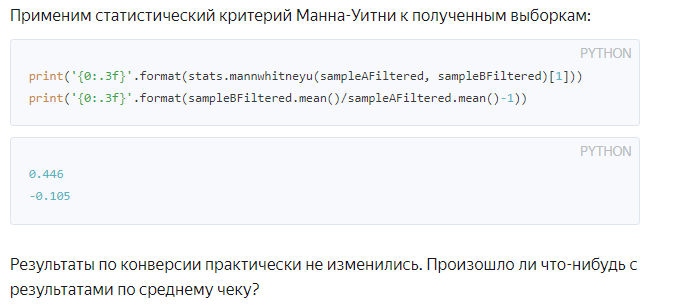
    
</ul></div><br>
</div>


### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным
Проверим гипотезы о различии показателей в среднем чеке в двух группах А и В по "очищенным" данным. За нулевую гипотезу примем предположение, что статистически значимых различий в размере среднего чека нет.

In [57]:
alpha = 0.05
if (st.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
                              np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                    orders[np.logical_and(orders['group']=='B',
                              np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1] < alpha):
    print("Отвергаем нулевую гипотезу, \nстатистически значимые различия в среднем чеке групп А и В есть")
else:
    print("Не получилось отвергнуть нулевую гипотезу, \nстатистически значимых различий в среднем чеке групп А и В нет")

print("p-value = {0:.3f}".format(st.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
                              np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                    orders[np.logical_and(orders['group']=='B',
                              np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

Не получилось отвергнуть нулевую гипотезу, 
статистически значимых различий в среднем чеке групп А и В нет
p-value = 0.720


In [58]:
print('Отношение среднего чека групп В и А = {0:.2%}'.format(
                                orders[np.logical_and(orders['group']=='B', 
                                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
                                orders[np.logical_and(orders['group']=='A',
                                         np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

Отношение среднего чека групп В и А = -2.31%


**Выводы по очищенным данным**

- Статистически значимых различий в среднем чеке групп А и В нет. Результат не изменился
- Средний чек группы В ниже на 2,3% (в среднем) чем в группе А. Показатель снизился на 27%
- После исключения из анализа аномально дорогих покупок выяснилось что действительно разница в среднем чеке между группами несущественна (с среднем).

**Решение по результатам теста**
- Остановить тест.
- Зафиксировать наличие статистически значимых различий по конверсии между группами по «сырым» данным, и по данным после фильтрации аномалий.
- Зафиксировать превышение конверсии в группе В над конверсией в группе А, в среднем на 14-17%.
- Зафиксировать отстутствие статистически значимого различия по среднему чеку между группами в обоих вариантах анализа.
- Зафиксировать отсутствие изменений в показателях среднего чека в пределах месяца наблюдений после проведения фильтрации данных.
<br>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Согласен  с результатами - ты привела объективные аргументы👌</div> <br>


# Заключение

**Приоритизация гипотез**
- Расчеты по прироритизаци двумя методами ICE и RICE
- Рейтинг гипотез по ICE (ТОП-5): 9, 1, 8, 7, 3 (места по убыванию)
- Рейтинг гипотез по RICE (ТОП-5): 8, 3, 1, 7, 9 (места по убыванию)
- Расклад по приоритету изменился после внесения одного фактора - охвата аудитории.
- По всем гипотезам это приоритет - максимальный охват аудитории, с меньшими затратами(не более среднего), и высоким значением уверенности влияния воздействия на аудиторию.

**Список актуальных гипотез для проверки (по убыванию приоритета)**

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.


**Анализ А/В теста

Количество посещений в группах за месяц теста сопостовимо:**

- 18736 – группа А
- 18916 – группа В

**Количество заказов:**

- 557 - группа А
- 640 - группа В
- Выручка по обеим группам устойчиво росла в течение всего теста.
- В группе В 18-20 августа заметный скачок в данных - дорогой заказ выбивающийся по стоимости из общего ряда. В последние 10 дней теста наметилась устойчивая разница в выручке между группами (в группе В выручка больше)

**Средний чек группы В стабильно растет, с резким скачком 18-20 августа.**

Группа А после провала в начале августа показывает более быстрый рост по среднему чеку, но стабилизируется на уровне 7000 уже к середине теста. Период "аномально" дорогих покупок в группе В удерживал уровень среднего чека выше чем в группе А.

**Конверсия по группам вначале наблюдений колеблется очень сильно.**
1. В первую неделю теста группа B проигрывает значительно - около 7% группе A.
2. После резкого роста, разница в конверсиях установилась на уровне 10% (выше у группы В).
3. Колебания конверсий к концу теста сохраняются в пределах 2-3%.

**Аномальные данные отфильтрованы по 95% охвату всех заказов, верхняя граница диапазона**

- Количество заказов - не более 2.
- Стоимость заказа - не более 30 000.
- Процент данных отброшенных для очистки - 6.6%
- Пользователей с аномальными заказами - 68

**Выводы по сырым данным**

- Статистически значимые различия в конверсии групп А и В есть.
- Конверсия группы В выше на 13,8% (в среднем) чем в группе А.
- Статистически значимых различий в среднем чеке групп А и В нет.
- Средний чек группы В выше на 25,87% (в среднем) чем в группе А.

**Выводы по очищенным данным**

- Статистически значимые различия в конверсии групп А и В есть. Результат не изменился.
- Конверсия группы В выше на 17,2% (в среднем) чем в группе А. Показатель вырос на 4%.
- Статистически значимых различий в среднем чеке групп А и В нет. Результат не изменился.
- Средний чек группы В ниже на 2,3% (в среднем) чем в группе А. Показатель снизился на 27%.
- После исключения из анализа аномально дорогих покупок выяснилось что действительно разница в среднем чеке между группами несущественна.

**Решение по результатам теста**
- Остановить тест.
- Зафиксировать наличие статистически значимых различий по конверсии между группами по «сырым» данным, и по данным после фильтрации аномалий.
- Зафиксировать превышение конверсии в группе В над конверсией в группе А, в среднем на 14-17%.
- Зафиксировать отстутствие статистически значимого различия по среднему чеку между группами в обоих вариантах анализа.
- Зафиксировать отсутствие изменений в показателях среднего чека в пределах месяца наблюдений после проведения фильтрации данных.

<hr style="border: 2px solid green;" />

## Общий комментарий
Спасибо за проделанную работу🤝

Евгения, проект выполнен очень хорошо: ты отличнот справилась с анализом метрик и проверкой гипотез, выявила аномалии, которые искажали реальные метрики, молодец👌

Не обошлось без доработок:
- указать вводную информацию перед проверками
- сформулировать гипотезы(у)
- поправить комментарии про измение в процентах

Исправляй и отправляй на проверку🛠

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>
<ul>
Спасибо большое за оперативную проверку с внесением крутых и запоминающихся замечаний. Единственное, я не совсем справилась с пунктом 4.4. Help me please😔
    </ul></div><br>
</div>
